![banner](https://github.com/alejosarin1/Hands-on-Computer-Vision/blob/main/sesiones/sesion3/banner.png?raw=1)


# üñ•Ô∏è‚ú® **Librerias importantes de Visi√≥n por Computadora**  

üîπ **TorchVision** - Base principal para tareas de visi√≥n por computadora.  
üìÇ **torchvision.datasets** - Accede a conjuntos de datos y carga de datos para visi√≥n por computadora.  
ü§ñ **torchvision.models** - Modelos pre-entrenados listos para usar en tareas de visi√≥n por computadora.  
üé® **torchvision.transforms** - Transformaciones para el procesamiento de im√°genes.  
üì¶ **torch.utils.data.Dataset** - Clase base para crear conjuntos de datos en PyTorch.  
üîÑ **torch.utils.data.DataLoader** - Crea un iterable en Python para recorrer un conjunto de datos.  


In [16]:
## @title Librerias importantes
import torch
from torch import nn
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [17]:
## @title Primer Modelo
import torch.nn as nn

class ModelCV(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features= input_shape  , out_features=hidden_units)
        self.relu = nn.ReLU() # Funcion de activacion
        self.fc2 = nn.Linear(in_features=hidden_units, out_features=output_shape)

    def forward(self, x):
        # x = self.flatten(x)
        # x = self.fc1(x)
        # x = self.fc2(x)
        # return x
        return self.fc2(self.relu(self.fc1(self.flatten(x))))

In [18]:
model = ModelCV(input_shape=1, hidden_units=10, output_shape=1)
# model.state_dict()
model

ModelCV(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

# üéõÔ∏è Capas Convolucionales (Convolutional Layers)

üõ†Ô∏è **Par√°metros clave:**  
- üèóÔ∏è **Tama√±o del kernel:** Define la regi√≥n de la imagen que analiza cada filtro.  
- ‚öôÔ∏è **Stride (desplazamiento):** Determina cu√°nto se mueve el filtro en cada paso.  
- üî≤ **Padding:** Agrega p√≠xeles alrededor de la imagen para mantener su tama√±o.

https://poloclub.github.io/cnn-explainer/

In [19]:
# Cambia las partes que digan "FIXME"
class ModelCV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.conv1 = nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=0)
    self.relu1 = nn.ReLU() # cambialo si quieres
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(in_features=26*26*hidden_units, out_features=hidden_units)
    self.relu2 = nn.ReLU()
    self.fc2 = nn.Linear(in_features=hidden_units, out_features=output_shape)

  def forward(self, x):
    return self.fc2(self.relu2(self.fc1(self.flatten(self.relu1(self.conv1(x))))))

## üìÇ Obteniendo un Dataset  

El dataset que utilizaremos es **Fashion MNIST**, proveniente de `torchvision.datasets`.  

üõçÔ∏è **Fashion MNIST** es una colecci√≥n de im√°genes en escala de grises que representa diferentes categor√≠as de ropa y accesorios. Es una alternativa moderna al cl√°sico **MNIST** de d√≠gitos escritos a mano.  

üìå **Fuente:** `torchvision.datasets`  


In [20]:
#Training y Testing Data
train_data = datasets.FashionMNIST(root = "data",
                                   train=True, # train dataset
                                   download = True,
                                   transform = ToTensor(), # posibles transformaciones
                                   target_transform=None
                                   )

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None
                                  )

In [22]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

image shape: torch.Size([1, 28, 28])


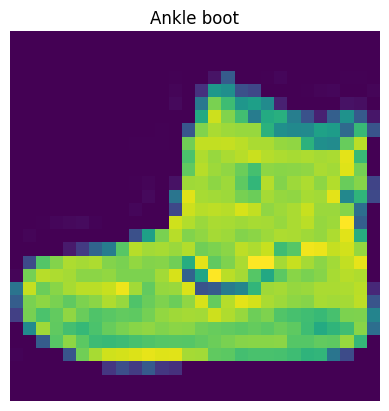

In [23]:
image, label = train_data[0] # Visualizacion
print(f"image shape: {image.shape}") # dimension de una imagen
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis("off")
plt.show()

### üëÄ Visualizaci√≥n del Dataset  

Para entender mejor los datos, vamos a visualizar algunas im√°genes del **Fashion MNIST**.  

üé® Vamos a graficar algunas muestras para observar su apariencia y distribuci√≥n.  


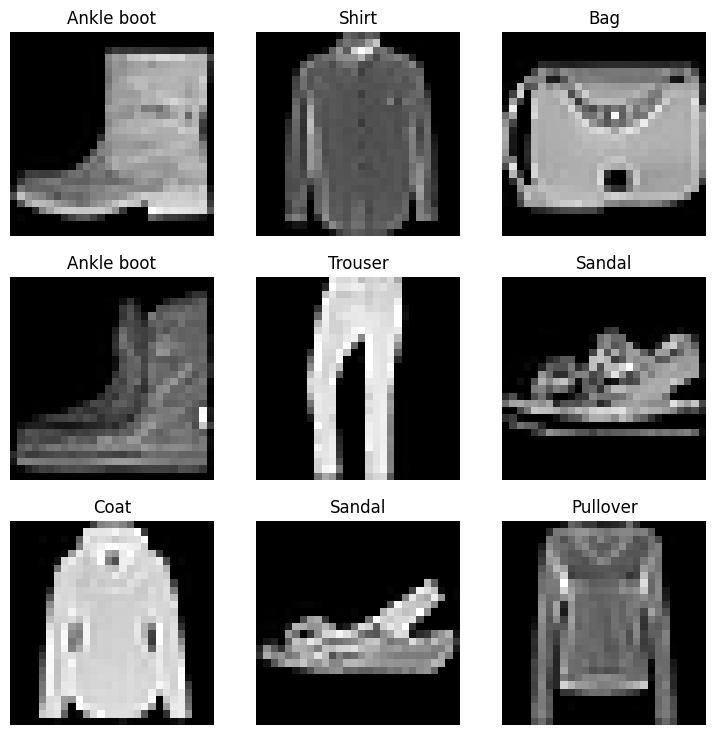

In [24]:
#VISUALIZE VISUALIZE VISUALIZE
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 3, 3 # cuantas imagenes quieras ver...
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [25]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### üöÇ TrainDataloader y TestDataloader  

Para entrenar y evaluar nuestro modelo, necesitamos **dataloaders** que nos ayuden a manejar los datos de manera eficiente.  

üîÑ **TrainDataloader**:  
Se encarga de cargar los datos de entrenamiento en **lotes (batches)**, permitiendo el procesamiento en paralelo y la optimizaci√≥n del rendimiento.  

üß™ **TestDataloader**:  
Nos permite evaluar el modelo con datos de prueba para medir su precisi√≥n y rendimiento.  

üìå Estos dataloaders provienen de `torch.utils.data.DataLoader`, que facilita la iteraci√≥n sobre los datasets de `torchvision.datasets`.  


In [26]:
BATCH_SIZE = 32 # Numero de imagenes por Batch

#turn datasets into iterables (batches)

train_dataloader = DataLoader(dataset = train_data,
                          batch_size = BATCH_SIZE,
                          shuffle=True)
test_dataloader = DataLoader(dataset = test_data,
                         batch_size = BATCH_SIZE,
                         shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ef3450b4410>,
 <torch.utils.data.dataloader.DataLoader at 0x7ef34507b1d0>)

In [27]:
# Veamos lo que acabamos de crear

print(f"DataLoaders: {train_dataloader,train_dataloader }")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ef3450b4410>, <torch.utils.data.dataloader.DataLoader object at 0x7ef3450b4410>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [28]:
# veamos que hay dentro del traindataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [29]:
# img_prueba = torch.rand(size=(32,1,28,28))
# print(img_prueba.shape)
# labels_len = len(class_names)
# model = ModelCV2(input_shape=1, hidden_units=64, output_shape=labels_len)
# salida = model(img_prueba)

In [30]:
model = ModelCV2(input_shape=1, hidden_units=64, output_shape=len(class_names))
model

ModelCV2(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=43264, out_features=64, bias=True)
  (relu2): ReLU()
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)

## üéØ Elecci√≥n de la Funci√≥n de P√©rdida y el Optimizador  

Para entrenar nuestra red neuronal, necesitamos definir:

üìå En PyTorch, podemos encontrar m√∫ltiples opciones en `torch.nn` (para la p√©rdida) y `torch.optim` (para el optimizador).  

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

In [32]:
# Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [33]:
# NO modifiques esta celda ‚ô•
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

# üöÄ Entrenamiento del Modelo  

Ahora entrenaremos nuestra red neuronal para que aprenda a clasificar las im√°genes del dataset.  

üîÑ **Proceso de entrenamiento:**  
1Ô∏è‚É£ Se env√≠an im√°genes al modelo.  
2Ô∏è‚É£ El modelo realiza predicciones.  
3Ô∏è‚É£ Se calcula la **p√©rdida (loss)** comparando predicciones con etiquetas reales.  
4Ô∏è‚É£ Se ajustan los pesos con el **optimizador**.  
5Ô∏è‚É£ Se repite el proceso en varias **√©pocas (epochs)** hasta mejorar el desempe√±o.  


In [34]:
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = 1

for epoch in tqdm(range(epochs)):
  train_loss = 0
  train_acc = 0
  for batch, (X_train, y_train) in enumerate(train_dataloader):
    model.train()
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_train_logits = model(X_train)


    # calculamos la funcion de perdida
    loss = loss_fn(y_train_logits, y_train)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y_train, y_pred = y_train_logits.argmax(dim=1))
    # optimizer zero grad

    optimizer.zero_grad()

    # retropropagacion
    loss.backward()
    # optimizer step step step
    optimizer.step()
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  model.eval()
  with torch.no_grad():
    test_loss = 0
    test_acc = 0
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      #forward pass
      y_test_logits = model(X_test)
      # calcular la loss
      test_loss += loss_fn(y_test_logits, y_test)
      test_acc += accuracy_fn(y_true = y_test, y_pred = y_test_logits.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"epoch: {epoch} | Train loss: {train_loss:.5f}, train acc: {train_acc:.2f} | Test loss: {test_loss:.5f}, test acc: {test_acc:.2f}")

  0%|          | 0/1 [00:00<?, ?it/s]

epoch: 0 | Train loss: 0.63396, train acc: 77.68 | Test loss: 0.49176, test acc: 82.24


# üìä Evaluaci√≥n del Modelo  

Despu√©s del entrenamiento, es momento de evaluar el desempe√±o de nuestra red neuronal.  

üõ†Ô∏è **Proceso de evaluaci√≥n:**  
1Ô∏è‚É£ Se usa el **TestDataloader** para pasar im√°genes de prueba al modelo.  
2Ô∏è‚É£ Se comparan las predicciones con las etiquetas reales.  
3Ô∏è‚É£ Se calcula la **precisi√≥n (accuracy)** y otras m√©tricas de rendimiento.  

üìå Esto nos ayuda a entender si el modelo **generaliza bien** o si necesita mejoras.  

In [35]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """ retorna un diccionario que contiene las predicciones del modelo"""
    loss, acc = 0, 0
    model.eval()

    with torch.no_grad():
      for X, y in tqdm(data_loader):
        #make predictions
        y_pred = model(X)

        # Accumulate the loss and acc values per batch

        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
      # scale the loss and acc to find the average loss and acc per batch

      loss /= len(data_loader)
      acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results = eval_model(model=model,
                             data_loader = test_dataloader,
                             loss_fn =  loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'ModelCV2',
 'model_loss': 0.4917627274990082,
 'model_acc': 82.23841853035144}

## üé® Visualizaci√≥n de las Predicciones del Modelo  

Para entender mejor el desempe√±o del modelo, vamos a **visualizar algunas predicciones**.  

üì∏ **Proceso:**  
1Ô∏è‚É£ Tomamos algunas im√°genes del conjunto de prueba.  
2Ô∏è‚É£ El modelo genera una predicci√≥n para cada imagen.  
3Ô∏è‚É£ Comparamos la predicci√≥n con la etiqueta real.  
4Ô∏è‚É£ Mostramos las im√°genes junto con sus etiquetas y predicciones.  

üìå Esto nos permite identificar posibles **errores** y mejorar el modelo si es necesario.  


In [36]:
# NO modifiques esta celda ‚ô•
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.no_grad():
    for sample in data:
      #add a bacth dimension and pass to target device
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit =  model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      #get pred_prob off the gpu
      pred_probs.append(pred_prob.cpu())

  #stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [37]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [38]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

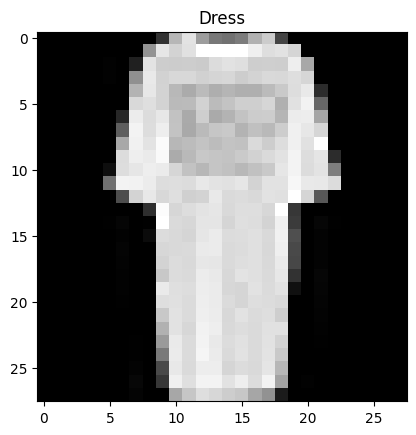

In [39]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [43]:
# Hacemos predicciones
pred_probs = make_predictions(model=  model,
                              data=test_samples,
                              )
#miremosüëÄ
pred_probs[:2]

tensor([[2.3475e-01, 6.5979e-03, 2.1603e-02, 6.4219e-01, 9.2311e-03, 1.7996e-07,
         8.5412e-02, 7.3234e-05, 9.5193e-05, 4.9055e-05],
        [3.5261e-03, 5.4109e-04, 3.0197e-03, 1.3555e-03, 4.1887e-04, 9.3248e-01,
         4.1627e-03, 3.7318e-02, 1.2681e-02, 4.4918e-03]])

In [44]:
# convertimos las probabilidades a clases
pred_class = pred_probs.argmax(dim=1)
pred_class, test_labels

(tensor([3, 5, 1, 6, 1, 1, 9, 1, 2]), [3, 5, 1, 6, 1, 1, 9, 3, 2])

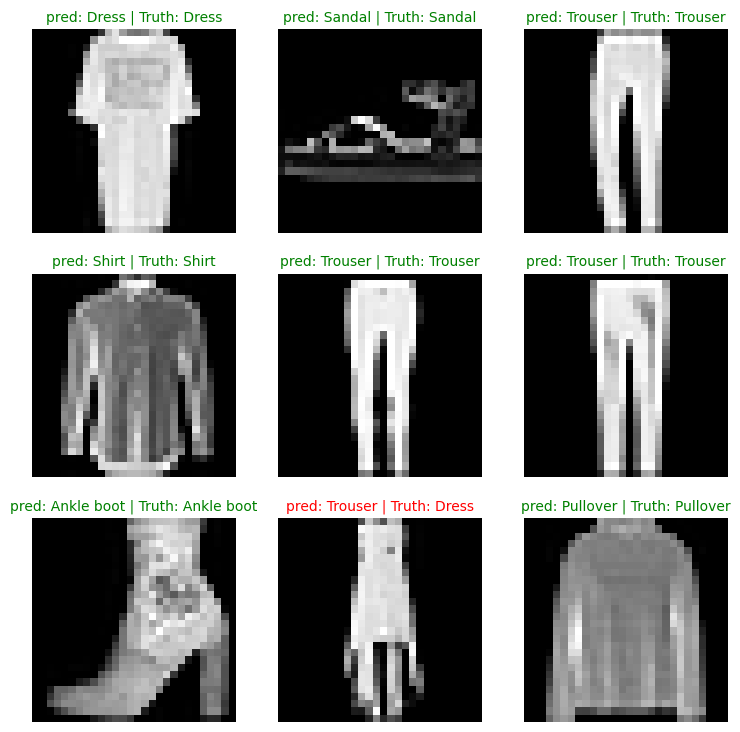

In [45]:
# NO modifiques esta celda ‚ô•
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  #plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")

  #find the prediction label
  pred_label = class_names[pred_class[i]]

  #get the truth label
  truth_label = class_names[test_labels[i]]

  #create a tittle for the plot
  tittle_text = f"pred: {pred_label} | Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(tittle_text, fontsize=10,c="g")
  else:
    plt.title(tittle_text, fontsize=10,c="r")
  plt.axis(False)

## üèóÔ∏è Implementaci√≥n de TinyVGG  

Vamos a construir **TinyVGG**, una versi√≥n simplificada de **VGGNet**, ideal para tareas de clasificaci√≥n de im√°genes.  

‚öôÔ∏è **Arquitectura de TinyVGG:**  
üîπ Capas convolucionales (`Conv2d`) para extraer caracter√≠sticas.  
üîπ Funci√≥n de activaci√≥n **ReLU** para introducir no linealidad.  
üîπ Capas de **MaxPooling** para reducir la dimensionalidad.  
üîπ Capas totalmente conectadas (`Linear`) para clasificar.  


In [46]:
#Test yourself try to replicate tinyvgg -> https://poloclub.github.io/cnn-explainer/
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    """
    Model Architecture that replicates the TinyVGG
    model from CNN explainer website
    """
    self.conv_blocl_1 = nn.Sequential(

    )
    self.conv_blocl_2 = nn.Sequential(

    )
    self.classifier = nn.Sequential(
    )

  def forward(self,x):
    x = self.conv_blocl_1(x)
    # print(x.shape)
    x = self.conv_blocl_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x

In [47]:
image.shape

torch.Size([1, 28, 28])

In [48]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [49]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # canales de la imagen
                              hidden_units=10, # numero de filtros
                              output_shape=len(class_names)
                              ).to(device)
# model_2.state_dict()

### Loss function and optimizer

In [62]:
loss_fn = nn.CrossEntropyLoss() # <-- ¬øPor qu√© este?
#cambialos si quieres
optimizer = torch.optim.SGD(params = model_2.parameters(), lr=0.01) # < -- ¬øPor qu√© este?

In [57]:
# DO NOT change this
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

##Train fuction

In [63]:
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs = 1

for epoch in tqdm(range(epochs)):
  train_loss = 0
  train_acc = 0
  for batch, (X_train, y_train) in enumerate(train_dataloader):
    model_2.train()
    X_train, y_train = X_train.to(device), y_train.to(device)

    y_train_logits = model_2(X_train) #forward pass

    # calcula la loss
    loss = loss_fn(y_train_logits, y_train)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y_train, y_pred = y_train_logits.argmax(dim=1))
    # optimizer zero grad
    optimizer.zero_grad()

    # retropropagacion
    loss.backward()
    # optimizer step step step
    optimizer.step()
  train_loss /= len(train_dataloader) # <- Why we should divide?
  train_acc /= len(train_dataloader)
  model_2.eval()
  with torch.no_grad():
    test_loss = 0
    test_acc = 0
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      #do the forward pass
      y_test_logits = model_2(X_test)
      #calculate the loss
      test_loss += loss_fn(y_test_logits, y_test)
      test_acc += accuracy_fn(y_true = y_test, y_pred = y_test_logits.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  print(f"epoch: {epoch} | Train loss: {train_loss:.5f}, train acc: {train_acc:.2f} | Test loss: {test_loss:.5f}, test acc: {test_acc:.2f}")

  0%|          | 0/1 [00:00<?, ?it/s]

epoch: 0 | Train loss: 0.45604, train acc: 83.50 | Test loss: 0.43917, test acc: 84.41


In [64]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """ returns a dictionary containing the results of model predicting on data_loader"""
    loss, acc = 0, 0
    model.eval()

    with torch.no_grad():
      for X, y in tqdm(data_loader):
        #make predictions
        y_pred = model(X)

        # Accumulate the loss and acc values per batch

        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
      # scale the loss and acc to find the average loss and acc per batch

      loss /= len(data_loader)
      acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results = eval_model(model=model_2,
                             data_loader = test_dataloader,
                             loss_fn =  loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.43917495012283325,
 'model_acc': 84.41493610223642}

# üìã Resumen del Modelo  

Despu√©s de construir nuestra red, es importante revisar su **estructura y cantidad de par√°metros**.  

üìå **El resumen del modelo nos muestra:**  
üîπ Las capas de la red y sus dimensiones.  
üîπ La cantidad de par√°metros entrenables.  
üîπ La conexi√≥n entre cada capa.  

‚úÖ En `PyTorch`, podemos usar `print(model)` o `torchsummary.summary(model, input_size=(C, H, W))` para visualizarlo.  


In [67]:
%%capture
! pip install torchinfo

In [68]:
import torchinfo
torchinfo.summary(model_2)

Layer (type:depth-idx)                   Param #
FashionMNISTModelV2                      --
‚îú‚îÄSequential: 1-1                        --
‚îÇ    ‚îî‚îÄConv2d: 2-1                       100
‚îÇ    ‚îî‚îÄReLU: 2-2                         --
‚îÇ    ‚îî‚îÄConv2d: 2-3                       910
‚îÇ    ‚îî‚îÄReLU: 2-4                         --
‚îÇ    ‚îî‚îÄMaxPool2d: 2-5                    --
‚îú‚îÄSequential: 1-2                        --
‚îÇ    ‚îî‚îÄConv2d: 2-6                       910
‚îÇ    ‚îî‚îÄReLU: 2-7                         --
‚îÇ    ‚îî‚îÄConv2d: 2-8                       910
‚îÇ    ‚îî‚îÄReLU: 2-9                         --
‚îÇ    ‚îî‚îÄMaxPool2d: 2-10                   --
‚îú‚îÄSequential: 1-3                        --
‚îÇ    ‚îî‚îÄFlatten: 2-11                     --
‚îÇ    ‚îî‚îÄLinear: 2-12                      4,910
Total params: 7,740
Trainable params: 7,740
Non-trainable params: 0